# Access satellite imagery using PythonSentinel 2 data: https://registry.opendata.aws/sentinel-2-l2a-cogs/

# Lecture 5 on accessing data: https://carpentries-incubator.github.io/geospatial-python/05-access-data/index.html

## SpatioTemporal Asset Catalog (STAC) specification is an emerging standard for describing geospatial data.
## Search the data STAC specifications: GUI vs Programmatically access data
### All type of metadata: https://stacindex.org/catalogs

# Earth search: https://stacindex.org/catalogs/earth-search#/

# STAC Search: https://radiantearth.github.io/stac-browser/#/
## Earth Search data (copy):  https://earth-search.aws.element84.com/v1/
## Sentinel 2A: https://radiantearth.github.io/stac-browser/#/external/earth-search.aws.element84.com/v1/collections/sentinel-2-l2a

### Click on source, copy link to satellite data: https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a

In [67]:
import rioxarray #rasterio xarray extension: foundational understanding of rioxarray
                 #rioxarray extends xarray with the rio accessor

In [68]:
api_url = "https://earth-search.aws.element84.com/v1" #URL to the data (remove stuff after collection)
#https://radiantearth.github.io/stac-browser/#/external/earth-search.aws.element84.com/v1/collections/sentinel-2-l2a

In [69]:
from pystac_client import Client #Web browser equivalent to retrieve data

client = Client.open(api_url) #Open the URL 
client

<Client id=earth-search-aws>

In [70]:
# Define the collection to pull form 
collection = "sentinel-2-l2a"

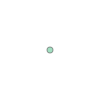

In [71]:
from shapely.geometry import Point  #Geospherical coordinate points 
#https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html

point = Point(4.89, 52.37) #Longitude and latitudinal coordinates in degrees 
point

In [72]:
#Collecting metadata for one point (4.89, 52.37) at different times in the past (5 to 10 days periods)
# Items are metadata collections of data files corresponding to a data capture
search = client.search(
    collections = [collection],
    intersects = point,
    max_items=10   #Most recent 10 ones, reverse chronological order
)

In [73]:
search.matched() #Matching data for the point previously chosen

868

In [74]:
items = search.item_collection()  #items stored that match what was searched
len(items)

10

In [75]:
#display the items (have cog assets)
for item in items:
    print(item)  #Most recent 10 ones: "20230711"

<Item id=S2A_31UFU_20230711_0_L2A>
<Item id=S2B_31UFU_20230709_0_L2A>
<Item id=S2B_31UFU_20230706_0_L2A>
<Item id=S2A_31UFU_20230704_0_L2A>
<Item id=S2A_31UFU_20230701_0_L2A>
<Item id=S2B_31UFU_20230629_0_L2A>
<Item id=S2B_31UFU_20230626_0_L2A>
<Item id=S2A_31UFU_20230624_0_L2A>
<Item id=S2A_31UFU_20230621_0_L2A>
<Item id=S2B_31UFU_20230616_0_L2A>


In [76]:
item = items[0] #selecting first item

In [77]:
item

<Item id=S2A_31UFU_20230711_0_L2A>

In [78]:
item.datetime  #date and time of the most recent capture

datetime.datetime(2023, 7, 11, 10, 46, 30, 905000, tzinfo=tzutc())

In [79]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[5.232846700126488, 53.228701503450445],
   [4.807091071208957, 52.248723820892856],
   [6.071664488869862, 52.22257539160585],
   [6.141754296879459, 53.20819279121764],
   [5.232846700126488, 53.228701503450445]]]}

In [80]:
item.properties #show all the properties of data capture

{'created': '2023-07-12T13:22:11.597Z',
 'platform': 'sentinel-2a',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'eo:cloud_cover': 61.812901,
 'proj:epsg': 32631,
 'mgrs:utm_zone': 31,
 'mgrs:latitude_band': 'U',
 'mgrs:grid_square': 'FU',
 'grid:code': 'MGRS-31UFU',
 'view:sun_azimuth': 154.560971098787,
 'view:sun_elevation': 57.4275951463925,
 's2:degraded_msi_data_percentage': 0.0188,
 's2:nodata_pixel_percentage': 32.883963,
 's2:saturated_defective_pixel_percentage': 0,
 's2:dark_features_percentage': 5.9e-05,
 's2:cloud_shadow_percentage': 1.331609,
 's2:vegetation_percentage': 20.954552,
 's2:not_vegetated_percentage': 5.242505,
 's2:water_percentage': 10.268399,
 's2:unclassified_percentage': 0.389978,
 's2:medium_proba_clouds_percentage': 23.260967,
 's2:high_proba_clouds_percentage': 6.826783,
 's2:thin_cirrus_percentage': 31.72515,
 's2:snow_ice_percentage': 0,
 's2:product_type': 'S2MSI2A',
 's2:processing_baseline': '05.09',
 's2:product_uri': 'S2A_MSIL2A_202

## Exercise: Make another search with a cloud cover < 15%

In [81]:
search = client.search(
    collections = [collection],
    intersects  = point,
    max_items = 10, 
    query     = ["eo:cloud_cover<15"]
)

## Exercise: Make another search with a polygon with a bounding box and cloud cover < 15%

In [82]:
# make a bounding box ±0.01 deg in lat/long

bbox= point.buffer(0.01).bounds #making a bounding box of ±0.01 deg around
bbox #bottom left: lat/long; top right: lat/long


(4.88, 52.36, 4.8999999999999995, 52.379999999999995)

In [85]:
# bounding box??

search = client.search(
    collections = [collection],
    #intersects  = point,  We can't use intersects with a bounding box
    bbox = bbox,  #bbox = [4.88, 52.36, 4.8999999999999995, 52.379999999999995]
    max_items = 10, 
    datetime = "2020-03-20/2020-03-30", #from first date to last date
    query     = ["eo:cloud_cover<15"],
)

In [86]:
search.matched() #Check the number of matched results

4

In [95]:
items = search.item_collection()  #Extract the items
items


In [96]:
items.save_object("search.json") #javascript object notation to write the items; makes a new file

In [99]:
assets = items[0].assets #grab the first item
assets.keys()   #show the output keys or assets (products inside the data, can be seen on the website)

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [100]:
for key,asset in assets.items():
    print(f"{key}:{asset.title}")

aot:Aerosol optical thickness (AOT)
blue:Blue (band 2) - 10m
coastal:Coastal aerosol (band 1) - 60m
granule_metadata:None
green:Green (band 3) - 10m
nir:NIR 1 (band 8) - 10m
nir08:NIR 2 (band 8A) - 20m
nir09:NIR 3 (band 9) - 60m
red:Red (band 4) - 10m
rededge1:Red edge 1 (band 5) - 20m
rededge2:Red edge 2 (band 6) - 20m
rededge3:Red edge 3 (band 7) - 20m
scl:Scene classification map (SCL)
swir16:SWIR 1 (band 11) - 20m
swir22:SWIR 2 (band 12) - 20m
thumbnail:Thumbnail image
tileinfo_metadata:None
visual:True color image
wvp:Water vapour (WVP)
aot-jp2:Aerosol optical thickness (AOT)
blue-jp2:Blue (band 2) - 10m
coastal-jp2:Coastal aerosol (band 1) - 60m
green-jp2:Green (band 3) - 10m
nir-jp2:NIR 1 (band 8) - 10m
nir08-jp2:NIR 2 (band 8A) - 20m
nir09-jp2:NIR 3 (band 9) - 60m
red-jp2:Red (band 4) - 10m
rededge1-jp2:Red edge 1 (band 5) - 20m
rededge2-jp2:Red edge 2 (band 6) - 20m
rededge3-jp2:Red edge 3 (band 7) - 20m
scl-jp2:Scene classification map (SCL)
swir16-jp2:SWIR 1 (band 11) - 20m


In [102]:
assets["thumbnail"].href   #See the thumbnail image which is small and can be accessed (as a check)

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/thumbnail.jpg'

In [105]:
import rioxarray   #helps gather the chunks of data from the internet rather than the whole data
#library that extends xarray library with geospatial capabilities

nir_href = assets["nir"].href  #Near infrared, raster (grid values)
nir = rioxarray.open_rasterio(nir_href)
nir

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [111]:
nir.rio.to_raster("nir.tif")   #Save as a tif file

In [114]:
nir[0,1500:2200,1500:2200]    #first is band number (first band = 0), slice in x, y which are different coordinates]

<xarray.DataArray (y: 700, x: 700)>
[490000 values with dtype=uint16]
Coordinates:
    band         int64 1
  * x            (x) float64 6.15e+05 6.15e+05 6.15e+05 ... 6.22e+05 6.22e+05
  * y            (y) float64 5.885e+06 5.885e+06 ... 5.878e+06 5.878e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [116]:
nir[0,1500:2200,1500:2200].rio.to_raster("nir_subset.tif")  #Adding rio 